<a href="https://colab.research.google.com/github/kushal-h/Deep-Learning-Implementations/blob/master/Mega_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mega Case Study - Making a hybrid Deep Learning Model

## **@Author: Kushal H**

## SOM + ANN

#Part 1 - SOM

##Install MiniSom Package

In [8]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=b2a3e3d51657b592a416ccd2ad49a91904b8185869012892214ea99a08391bc3
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


## Importing the libraries


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [17]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [19]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


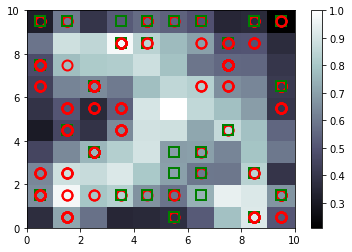

In [20]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [23]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,8)], mappings[(1,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [24]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15686461
15684512
15680643
15692137
15668830
15796569
15712877
15691150
15573520
15740458
15686885
15585928
15680895
15807546
15773869
15796111
15809800
15623072
15676909
15750055
15647898
15679801
15569682
15587038
15592773
15732943
15781975
15770255
15773789
15794868
15705506
15812470
15674583
15588854
15788215
15722535
15793825
15750104


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [25]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [26]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [28]:
import tensorflow as tf
tf.__version__

'2.3.0'

## Initializing the ANN

In [29]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [30]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [31]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [33]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 972us/step - loss: 0.7908 - accuracy: 0.5826
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.4684 - accuracy: 0.9130
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.3312 - accuracy: 0.9435
Epoch 4/10
690/690 [==============================] - 1s 990us/step - loss: 0.2566 - accuracy: 0.9449
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2231 - accuracy: 0.9449
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2065 - accuracy: 0.9449
Epoch 7/10
690/690 [==============================] - 1s 996us/step - loss: 0.1973 - accuracy: 0.9449
Epoch 8/10
690/690 [==============================] - 1s 964us/step - loss: 0.1915 - accuracy: 0.9449
Epoch 9/10
690/690 [==============================] - 1s 965us/step - loss: 0.1871 - accuracy: 0.9449
Epoch 10/10
690/690 [==============================] - 1s 952us/step - loss: 0.1829 - accu

## Predicting test set results

In [34]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [35]:
print(y_pred)

[[1.56214230e+07 4.75794077e-04]
 [1.57363990e+07 5.87671995e-04]
 [1.57785890e+07 6.22957945e-04]
 ...
 [1.56465630e+07 1.22874826e-01]
 [1.57631940e+07 1.22874826e-01]
 [1.57882150e+07 1.25915587e-01]]
